In [1]:
import pandas as pd
import numpy as np

In [10]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

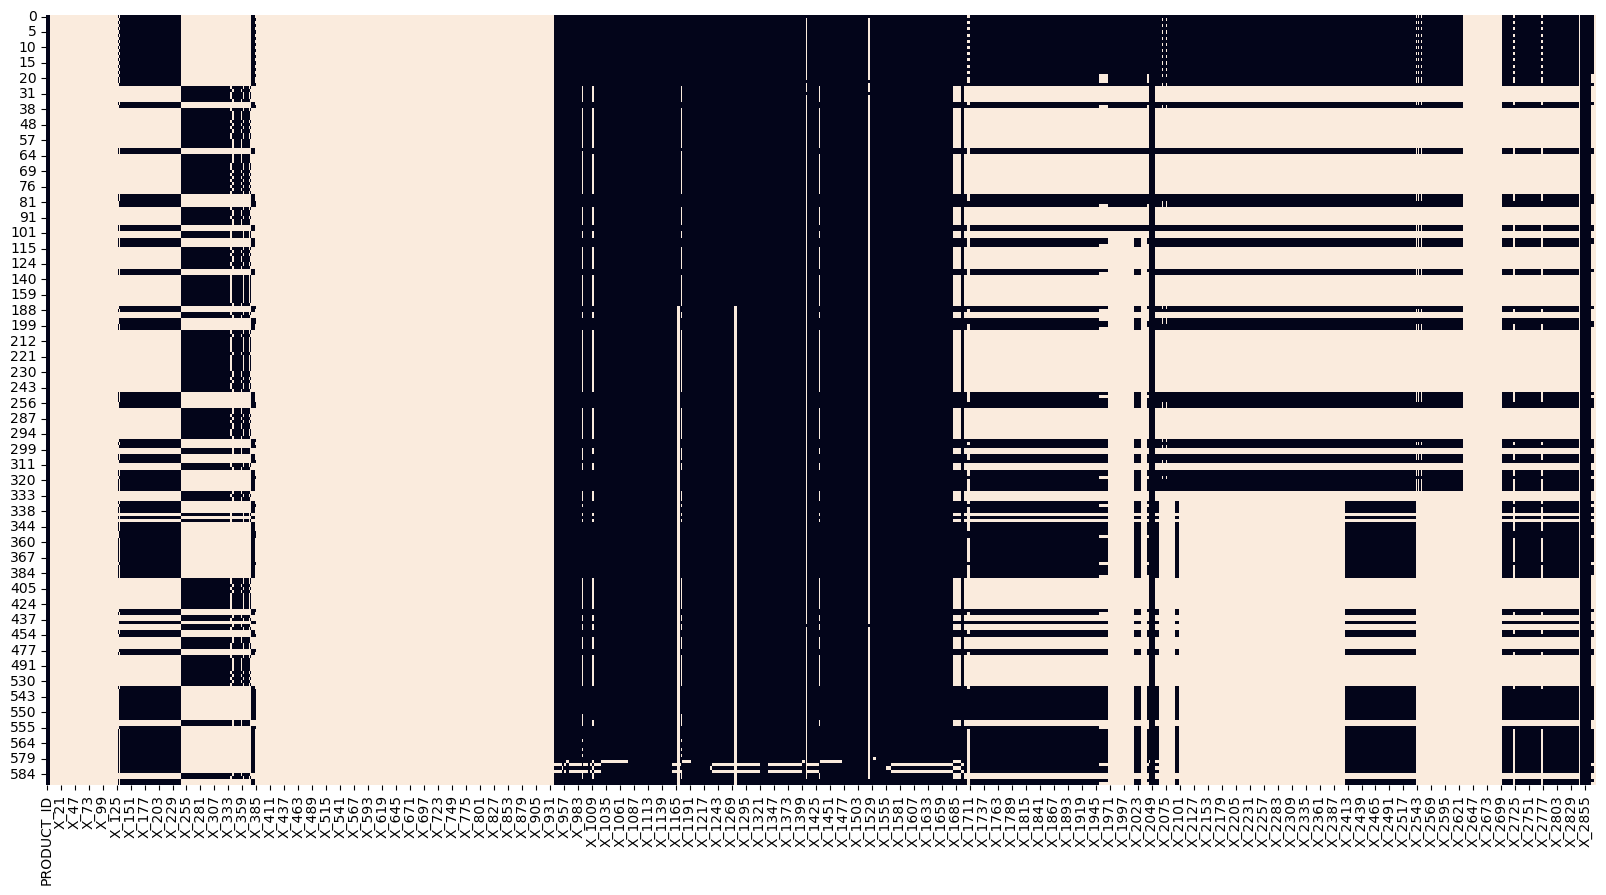

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

null = train_df[train_df.PRODUCT_CODE=='A_31'].isnull()
plt.figure(figsize=(20, 10))
sns.heatmap(null, cbar=False)
plt.show()

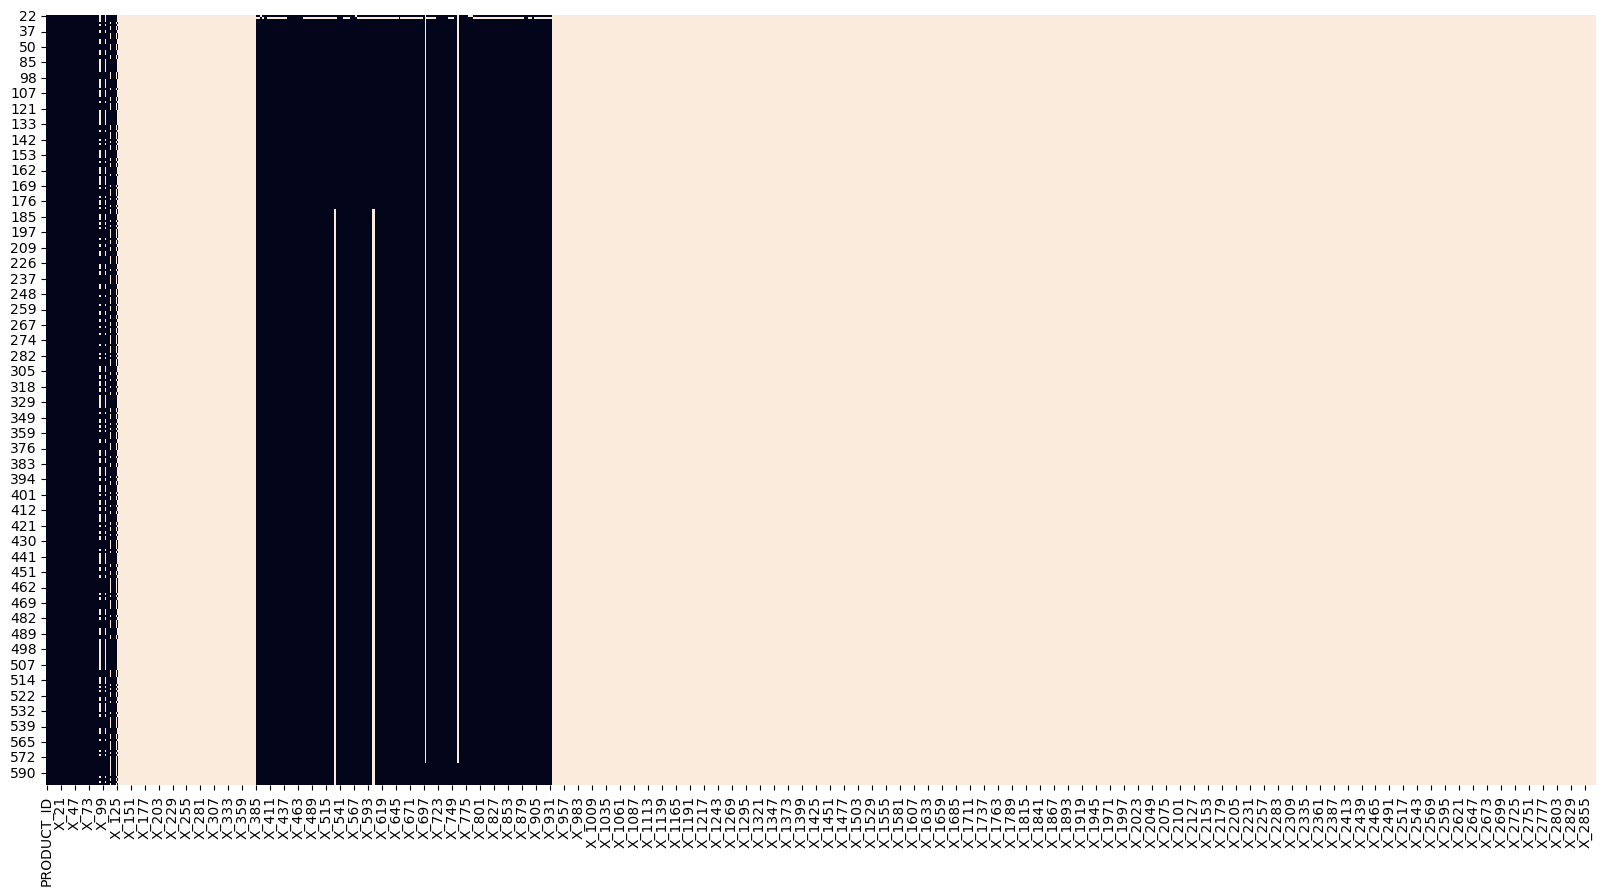

In [9]:
# 각 셀이 null인지 여부를 나타내는 불리언 데이터프레임 생성
null = train_df[(train_df.PRODUCT_CODE=='T_31') | (train_df.PRODUCT_CODE=='O_31')].isnull()

# 새로운 figure 생성 및 크기 조절
plt.figure(figsize=(20, 10))

# seaborn을 사용한 히트맵 시각화
sns.heatmap(null, cbar=False)

# 그래프 표시
plt.show()

In [19]:
train_a = pd.read_csv('./data/train_a.csv')
train_to = pd.read_csv('./data/train_to.csv')
print(train_a.shape, train_to.shape)

(249, 1741) (349, 630)


In [20]:
train = pd.read_csv('./data/train.csv')
train.shape

(598, 2881)

In [36]:
train_a.shape, train_a_nullx.shape, train_a_nullx_val1x.shape, df1_filtered.shape

((249, 2881), (249, 2122), (249, 2098), (249, 648))

In [ ]:
train_a.shape, train_a_nullx.shape, train_a_nullx_val1x.shape, df1_filtered.shape

In [43]:
train_a.shape, df1_filtered.shape

((249, 2881), (249, 648))

In [44]:
train_to.shape, df2_filtered.shape

((349, 2881), (349, 380))

In [27]:
train = pd.read_csv('./data/train.csv')
train_a = train[train.PRODUCT_CODE=='A_31']
train_to = train[(train.PRODUCT_CODE=='T_31') | (train.PRODUCT_CODE=='O_31')]

# 전체 null값 컬럼 제거
null_lst1 = []
null_lst2 = []
for i in train_a.columns:
    if train_a[i].isnull().sum()==249:
        null_lst1.append(i)
        
for i in train_to.columns:
    if train_to[i].isnull().sum()==349:
        null_lst2.append(i)

train_a_nullx = train_a.drop(columns = null_lst1)
train_to_nullx = train_to.drop(columns = null_lst2)

In [28]:
# 동일한 값으로 채워진 컬럼 제거
val1_lst1 = []
val1_lst2 = []
for i in train_a_nullx.columns:
    if len(train_a_nullx[i].unique()) == 1:
        val1_lst1.append(i)
        
for i in train_to_nullx.columns:
    if len(train_to_nullx[i].unique()) == 1:
        val1_lst2.append(i)
        
train_a_nullx_val1x = train_a_nullx.drop(columns = val1_lst1)
train_to_nullx_val1x = train_to_nullx.drop(columns = val1_lst2)        

In [30]:
df1 = train_a_nullx_val1x.iloc[:,6:]
corr_matrix = df1.corr()
highcorr_lst = []

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        if i < j: #하나만 삭제하기 위해
            if abs(corr_matrix.iloc[i, j]) >= 0.9:
                highcorr_lst.append(corr_matrix.columns[j])

highcorr_lst = list(set(highcorr_lst))

print("상관계수 높은 컬럼들", highcorr_lst)
print("몇개인지", len(highcorr_lst))

상관계수 높은 컬럼들 ['X_1073', 'X_2116', 'X_1940', 'X_2413', 'X_2394', 'X_2177', 'X_1352', 'X_1476', 'X_2608', 'X_1962', 'X_2355', 'X_1042', 'X_1326', 'X_1951', 'X_2183', 'X_1484', 'X_2470', 'X_2295', 'X_1583', 'X_1825', 'X_2539', 'X_1452', 'X_2536', 'X_294', 'X_994', 'X_2466', 'X_2148', 'X_2217', 'X_1186', 'X_2149', 'X_2042', 'X_2057', 'X_1419', 'X_1953', 'X_2849', 'X_1334', 'X_2491', 'X_2843', 'X_2143', 'X_1973', 'X_1350', 'X_1351', 'X_1491', 'X_2702', 'X_1908', 'X_2432', 'X_1163', 'X_1595', 'X_1986', 'X_1473', 'X_1794', 'X_1750', 'X_2579', 'X_1728', 'X_2027', 'X_2233', 'X_1879', 'X_1066', 'X_2847', 'X_219', 'X_2322', 'X_2522', 'X_943', 'X_223', 'X_281', 'X_1512', 'X_1499', 'X_1882', 'X_1682', 'X_2356', 'X_2271', 'X_2300', 'X_1805', 'X_1656', 'X_1322', 'X_1977', 'X_2163', 'X_2140', 'X_2171', 'X_1545', 'X_2395', 'X_1108', 'X_942', 'X_1062', 'X_2367', 'X_2094', 'X_2714', 'X_2429', 'X_1928', 'X_2347', 'X_1892', 'X_2127', 'X_2187', 'X_2867', 'X_373', 'X_2727', 'X_1238', 'X_979', 'X_1604', 'X_230

In [31]:
df1_filtered = df1.drop(columns=highcorr_lst)
df1_filtered

,X_129,X_130,X_132,X_133,X_134,X_135,X_141,X_142,X_143,X_144,...,X_2770,X_2771,X_2772,X_2773,X_2775,X_2776,X_2837,X_2839,X_2840,X_2871
0,7813.0,NaN,0.19,0.20,0.19,0.2,567.3,0.0,0.0,249.96,...,230.0,229.974074,229.9,NaN,NaN,290.0,9.04,5.02,7.00,NaN
1,NaN,19854.0,0.20,0.21,0.20,0.2,575.9,0.0,0.0,249.97,...,230.0,229.980000,229.9,0.0,0.0,290.0,8.00,5.00,7.05,NaN
2,7815.0,NaN,0.19,0.20,0.19,0.2,572.9,0.0,0.0,249.97,...,230.1,229.992593,229.9,NaN,NaN,290.0,9.04,5.02,6.52,NaN
3,NaN,19856.0,0.20,0.21,0.20,0.2,562.2,0.0,0.0,249.97,...,230.1,230.018518,229.9,0.0,0.0,290.0,7.49,5.01,7.03,NaN
4,7817.0,NaN,0.19,0.20,0.18,0.2,565.9,0.0,0.0,249.96,...,230.1,230.007407,229.9,NaN,NaN,291.0,9.04,5.03,6.52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,11920.0,NaN,0.19,0.20,0.19,0.2,555.9,0.0,0.0,249.97,...,230.0,229.996296,229.9,NaN,NaN,290.0,9.00,4.99,7.00,1.0
584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,14810.0,NaN,0.19,0.20,0.19,0.2,574.8,0.0,0.0,249.97,...,230.1,229.989286,229.9,NaN,NaN,290.0,8.51,4.99,7.00,1.0


In [32]:
df2 = train_to_nullx_val1x.iloc[:,6:]
corr_matrix2 = df2.corr()
highcorr_lst2 = []

for i in range(len(corr_matrix2.columns)):
    for j in range(len(corr_matrix2.columns)):
        if i < j: #하나만 삭제하기 위해
            if abs(corr_matrix2.iloc[i, j]) >= 0.9:
                highcorr_lst2.append(corr_matrix2.columns[j])

highcorr_lst2 = list(set(highcorr_lst2))

print("상관계수 높은 컬럼들", highcorr_lst2)
print("몇개인지", len(highcorr_lst2))

상관계수 높은 컬럼들 ['X_928', 'X_547', 'X_877', 'X_911', 'X_422', 'X_579', 'X_663', 'X_772', 'X_472', 'X_416', 'X_740', 'X_506', 'X_50', 'X_629', 'X_527', 'X_449', 'X_65', 'X_125', 'X_54', 'X_842', 'X_705', 'X_575', 'X_892', 'X_44', 'X_713', 'X_385', 'X_800', 'X_97', 'X_568', 'X_120', 'X_418', 'X_534', 'X_747', 'X_38', 'X_745', 'X_12', 'X_801', 'X_719', 'X_59', 'X_854', 'X_917', 'X_841', 'X_57', 'X_101', 'X_797', 'X_775', 'X_490', 'X_731', 'X_653', 'X_630', 'X_763', 'X_929', 'X_809', 'X_750', 'X_739', 'X_708', 'X_627', 'X_819', 'X_811', 'X_727', 'X_626', 'X_712', 'X_817', 'X_117', 'X_87', 'X_833', 'X_916', 'X_526', 'X_63', 'X_702', 'X_22', 'X_858', 'X_455', 'X_523', 'X_625', 'X_923', 'X_820', 'X_925', 'X_42', 'X_88', 'X_119', 'X_803', 'X_832', 'X_386', 'X_808', 'X_648', 'X_748', 'X_834', 'X_870', 'X_924', 'X_771', 'X_895', 'X_853', 'X_401', 'X_402', 'X_930', 'X_535', 'X_540', 'X_419', 'X_99', 'X_459', 'X_720', 'X_893', 'X_578', 'X_528', 'X_123', 'X_805', 'X_685', 'X_645', 'X_896', 'X_127', 'X_

In [33]:
df2_filtered = df2.drop(columns=highcorr_lst2)
df2_filtered

,X_1,X_2,X_5,X_7,X_8,X_9,X_11,X_15,X_16,X_17,...,X_905,X_906,X_907,X_908,X_909,X_910,X_912,X_931,X_932,X_933
22,2.0,102.0,11.0,45.0,10.0,31.0,514.4,0.0,247.5,248.0,...,0.0,17.28,17.277333,17.27,0.01,0.7,0.6,13.7,13.443333,13.2
23,2.0,102.0,11.0,45.0,10.0,31.0,514.6,0.0,247.6,248.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,2.0,97.0,11.0,45.0,10.0,31.0,517.4,0.0,247.5,247.8,...,1.0,17.28,17.276452,17.27,0.01,0.7,0.6,13.7,13.454839,13.2
26,2.0,95.0,10.0,54.0,10.0,52.0,477.4,0.0,247.5,248.1,...,1.0,17.28,17.276452,17.27,0.01,0.7,0.6,13.7,13.461290,13.3
29,2.0,100.0,11.0,45.0,10.0,31.0,516.5,0.0,247.6,248.1,...,1.0,17.28,17.277419,17.27,0.01,0.7,0.6,13.7,13.422581,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,1.0,87.0,10.0,50.0,10.0,52.0,465.9,0.0,247.6,248.0,...,0.0,17.28,17.276129,17.27,0.01,0.7,0.6,13.6,13.400000,13.2
592,2.0,98.0,10.0,45.0,10.0,31.0,505.5,0.0,247.5,247.9,...,0.0,17.28,17.276774,17.27,0.01,0.7,0.6,13.6,13.361290,13.2
593,2.0,95.0,10.0,50.0,10.0,52.0,468.9,0.0,247.5,248.0,...,0.0,17.28,17.276452,17.27,0.01,0.7,0.6,13.6,13.351613,13.2
596,40.0,94.0,11.0,45.0,10.0,31.0,505.8,0.0,247.5,248.1,...,0.0,17.28,17.277000,17.27,0.01,0.7,0.6,13.6,13.406667,13.2


In [39]:
df1_filtered.to_csv('./data/a_nullx_val1x_highcorx.csv', index = False)
df2_filtered.to_csv('./data/to_nullx_val1x_highcorx.csv', index = False)

In [40]:
a_df = pd.concat([train_a.iloc[:,:6], df1_filtered], axis = 1)
a_df

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_129,X_130,X_132,X_133,...,X_2770,X_2771,X_2772,X_2773,X_2775,X_2776,X_2837,X_2839,X_2840,X_2871
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,7813.0,NaN,0.19,0.20,...,230.0,229.974074,229.9,NaN,NaN,290.0,9.04,5.02,7.00,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,19854.0,0.20,0.21,...,230.0,229.980000,229.9,0.0,0.0,290.0,8.00,5.00,7.05,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,7815.0,NaN,0.19,0.20,...,230.1,229.992593,229.9,NaN,NaN,290.0,9.04,5.02,6.52,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,19856.0,0.20,0.21,...,230.1,230.018518,229.9,0.0,0.0,290.0,7.49,5.01,7.03,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,7817.0,NaN,0.19,0.20,...,230.1,230.007407,229.9,NaN,NaN,291.0,9.04,5.03,6.52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,TRAIN_583,0,0.522340,2022-09-05 8:34,T050304,A_31,11920.0,NaN,0.19,0.20,...,230.0,229.996296,229.9,NaN,NaN,290.0,9.00,4.99,7.00,1.0
584,TRAIN_584,0,0.519519,2022-09-05 11:09,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585,TRAIN_585,0,0.515214,2022-09-05 11:17,T010306,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,14810.0,NaN,0.19,0.20,...,230.1,229.989286,229.9,NaN,NaN,290.0,8.51,4.99,7.00,1.0


In [41]:
to_df = pd.concat([train_to.iloc[:,:6], df2_filtered], axis = 1)
to_df

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_5,X_7,...,X_905,X_906,X_907,X_908,X_909,X_910,X_912,X_931,X_932,X_933
22,TRAIN_022,0,0.517719,2022-06-14 8:53,T100304,T_31,2.0,102.0,11.0,45.0,...,0.0,17.28,17.277333,17.27,0.01,0.7,0.6,13.7,13.443333,13.2
23,TRAIN_023,0,0.519090,2022-06-14 9:01,T100304,T_31,2.0,102.0,11.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,TRAIN_025,1,0.529362,2022-06-19 9:11,T100304,T_31,2.0,97.0,11.0,45.0,...,1.0,17.28,17.276452,17.27,0.01,0.7,0.6,13.7,13.454839,13.2
26,TRAIN_026,1,0.531992,2022-06-19 9:20,T100306,T_31,2.0,95.0,10.0,54.0,...,1.0,17.28,17.276452,17.27,0.01,0.7,0.6,13.7,13.461290,13.3
29,TRAIN_029,1,0.532405,2022-06-19 23:31,T100304,T_31,2.0,100.0,11.0,45.0,...,1.0,17.28,17.277419,17.27,0.01,0.7,0.6,13.7,13.422581,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,TRAIN_591,1,0.529308,2022-09-07 1:09,T100306,T_31,1.0,87.0,10.0,50.0,...,0.0,17.28,17.276129,17.27,0.01,0.7,0.6,13.6,13.400000,13.2
592,TRAIN_592,1,0.528349,2022-09-08 14:22,T100304,T_31,2.0,98.0,10.0,45.0,...,0.0,17.28,17.276774,17.27,0.01,0.7,0.6,13.6,13.361290,13.2
593,TRAIN_593,1,0.526546,2022-09-08 14:30,T100306,T_31,2.0,95.0,10.0,50.0,...,0.0,17.28,17.276452,17.27,0.01,0.7,0.6,13.6,13.351613,13.2
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,11.0,45.0,...,0.0,17.28,17.277000,17.27,0.01,0.7,0.6,13.6,13.406667,13.2


In [42]:
a_df.to_csv('./data/a_df.csv', index = False)
to_df.to_csv('./data/to_df.csv', index = False)

이제 상관분석 종속변수 넣어서 진행


In [38]:
a_df = pd.concat([train_a.Y_Class, df1_filtered], axis = 1)
corr_matrix = a_df.corr()

# 히트맵 그리기
plt.figure(figsize=(40, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.savefig('./image/a_df.png')
plt.show()


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x12f26eee0> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x14d35f3a0> (for post_execute):



KeyboardInterrupt

